                                     Titanic survived Project


# INSTALLING THE REQUIRED DEPENDENCY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#LOADING ALL THE CSV FILE TO MERGE INTO ONE DATAFRAME
gender_submission = pd.read_csv('gender_submission.csv' , index_col='PassengerId')
test = pd.read_csv('test.csv' , index_col='PassengerId')
train = pd.read_csv('train.csv' , index_col='PassengerId')
#JOINING THE DATAFRAMES
titanic_data = gender_submission.merge(test, how='inner', on='PassengerId')
#overlooking thorugh the data set
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# DATA ANALYSIS

In [4]:
titanic_data.shape

(418, 11)

In [5]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

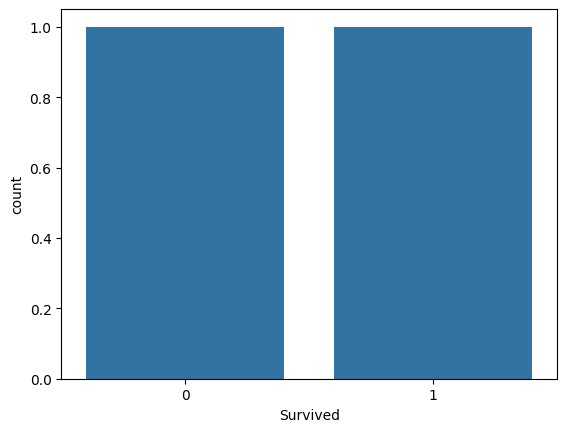

In [7]:
sns.countplot(titanic_data['Survived'].value_counts())

it show the equal distrubtion of the servived ratio or this shows the data is balanced

In [8]:
# Check for duplicate rows
duplicates = titanic_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


<Axes: ylabel='Count'>

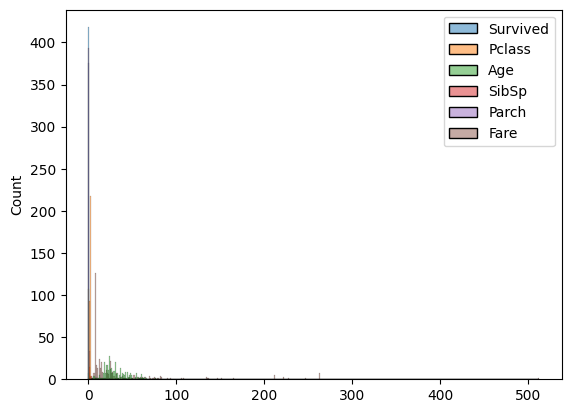

In [9]:
sns.histplot(titanic_data)

# DATA PREPROCESSSING 
# MISSING VALUES

In [10]:
#cheaking for the missing value
missing_values = titanic_data.isnull().sum()
print(missing_values[ missing_values > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


<Axes: ylabel='PassengerId'>

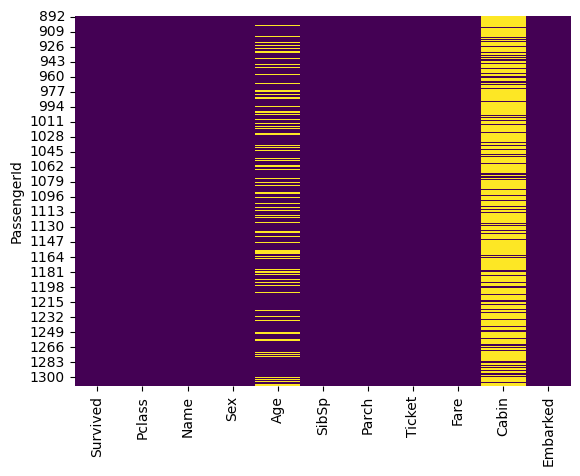

In [11]:
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')

HANDILING THE MISSING VALUES AND DROPING UNWANTED FEATURES

In [12]:
#droping the trash
list_to_drop = ['Name' ,'Cabin' , 'Ticket'  ]
titanic_data = titanic_data.drop(columns = list_to_drop)

In [13]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,S
1306,1,1,female,39.0,0,0,108.9000,C
1307,0,3,male,38.5,0,0,7.2500,S


<Axes: xlabel='Fare', ylabel='Count'>

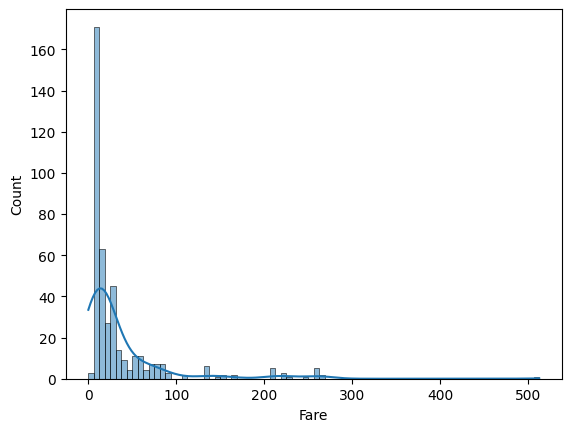

In [14]:
#for fare 
sns.histplot(titanic_data['Fare'] , kde = True)

In [15]:
#imputating the missing values of Fare
titanic_data['Fare'].fillna(titanic_data['Fare'].median() , inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

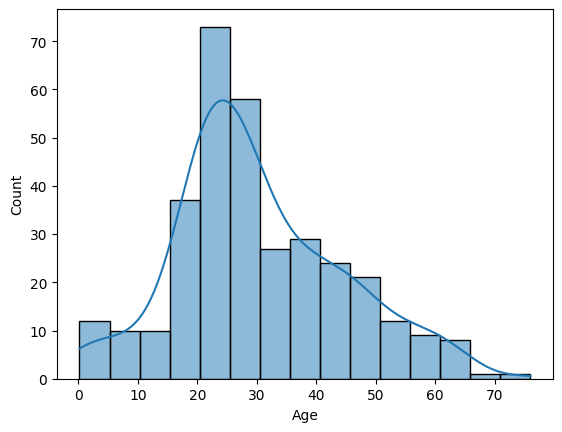

In [16]:
#for age continous data
sns.histplot(titanic_data['Age'] , kde= True)

THE AGE FEATURE IS BELL SHAPED CUREVED SO WE ARE GOONA USE MEAN TO IMPUTE THE MISSING VALUES

In [17]:
titanic_data['Age'].fillna(titanic_data['Age'].mean() , inplace=True)

In [18]:
missing  = titanic_data.isnull().sum()
print(missing [missing > 0])

Series([], dtype: int64)


<Axes: ylabel='PassengerId'>

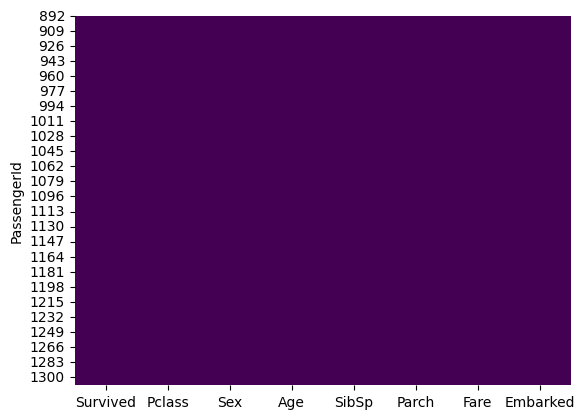

In [19]:
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')

so all the missing value have been treated properly now we move futher

#  OULTLIERS

<Axes: >

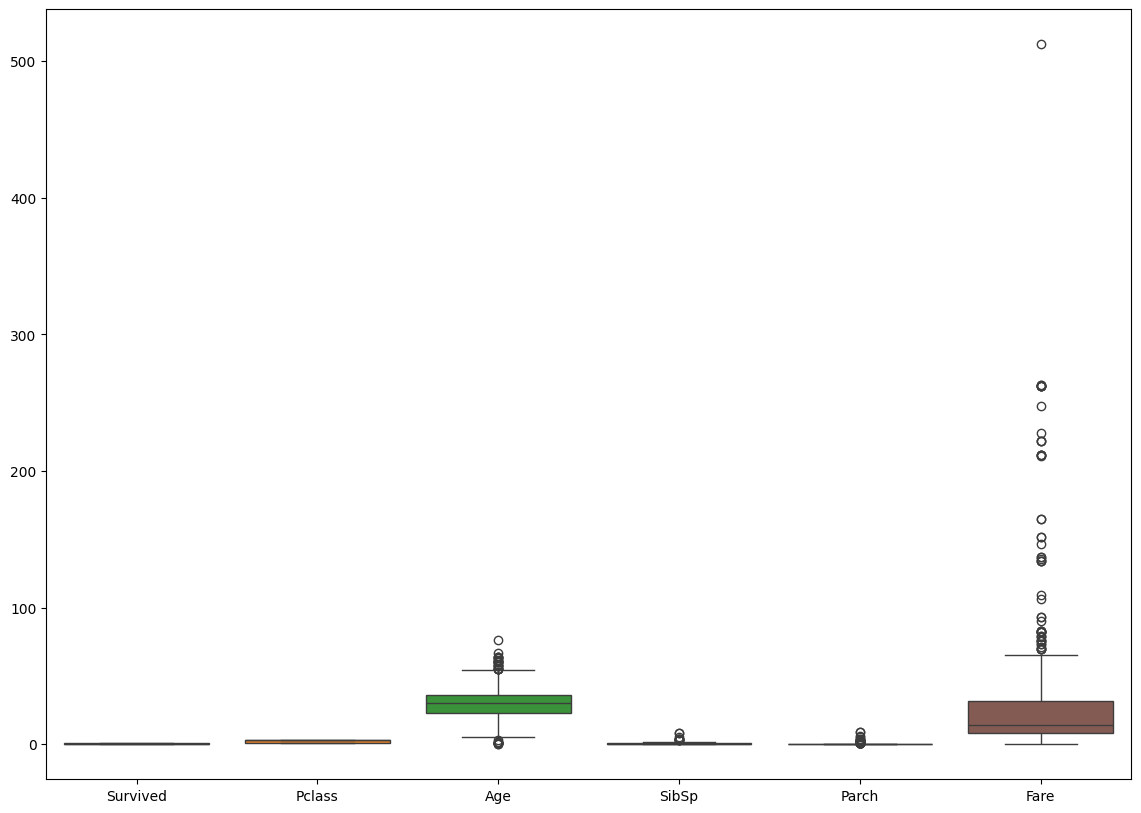

In [20]:
#CHEAKING FOR OUTLIERS
plt.figure(figsize = (14 , 10))
sns.boxplot(titanic_data)

SO AS WE CAN SEE THE AGE AND THE FARE FEATURES AND OUTLIERS AND IT IS A SMALL DATA SO THIS OUTLIERS CAN MAKE A POWERFULL IMPACT
ON MODEL PERFORMACE SO WE GONNA TREAT THEM.

<Axes: xlabel='Age', ylabel='Count'>

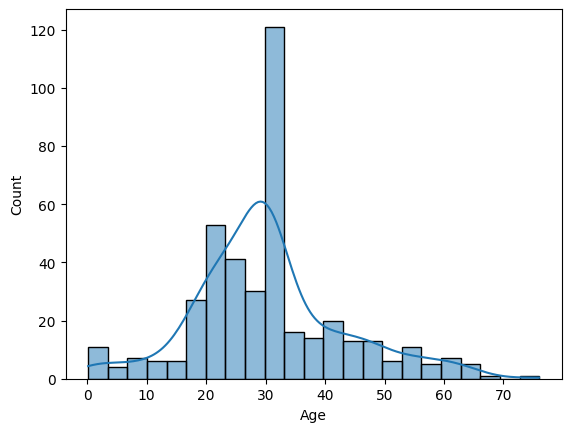

In [21]:
#CHEAKING THE DISTRIBUTION OG AGE AND FARE SO I CAN CHOOSE BEST METHOD.
sns.histplot(titanic_data['Age'] , kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

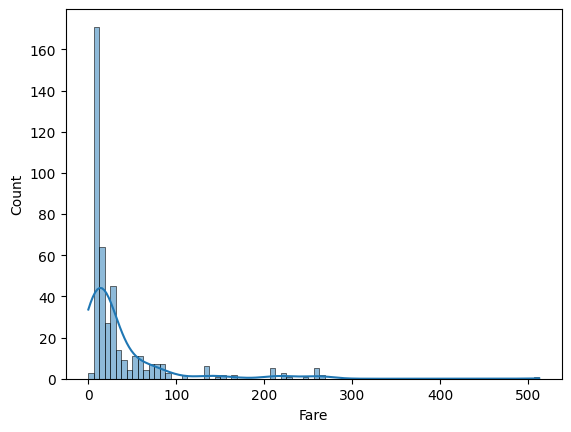

In [22]:
sns.histplot(titanic_data['Fare']  , kde = True)



FOR ASYMETRIC DISTRUBUTION  WE SHOULD GO FOR IQR METHOD AND FOR THE NORMAL DISTRUBAION WE ARE GOOING TO USE THE 
Z SCORE METHOD TO HANDLE THE OUTLIERS


In [23]:
titanic_data.shape

(418, 8)

# INTERQUARTILE RANGE FOR 'FARE'


In [24]:
from scipy import stats
#DEFING THE Q1 AND Q3
q1 = titanic_data['Fare'].quantile(0.25)
q3 = titanic_data['Fare'].quantile(0.75)
iqr = q3 - q1
#SETIING THE UPPER AND LOWER LIMIT 
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
#filtering outliers 
titanic_data = titanic_data[(titanic_data['Fare'] >= lower_limit) & (titanic_data['Fare'] <= upper_limit)]

# Z - SCORE FOR AGE 

In [25]:
from scipy import stats
# Calculate the Z-score for the 'Age' feature
# First, we handle NaN values and then calculate Z-scores
titanic_data['age_zscore'] = stats.zscore(titanic_data['Age'])
# Define the threshold for outlier removal
threshold = 3
# Filter out the outliers based on Z-score
titanic_data = titanic_data[np.abs(titanic_data['age_zscore']) < threshold]
# Drop the Z-score column as it's no longer needed
titanic_data = titanic_data.drop(columns=['age_zscore'])

C:\Users\adity\AppData\Local\Temp\ipykernel_11524\4096007293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['age_zscore'] = stats.zscore(titanic_data['Age'])


NOW CHEAKING FOR THE OUTLIER AGIAN


In [26]:
print("Shape after outlier removal:", titanic_data.shape , "AND OLD SHAPE WAS (418, 8) ")

Shape after outlier removal: (361, 8) AND OLD SHAPE WAS (418, 8) 


SO NOW WE HAVE HANDLE THE MISSING VALUES PROPERLY NOW WE ARE PLOT SOME MORE GRAPHS TO UNDERSTAND THE DATASET MORE WELL.

#  Encoding Categorical Variables


In [27]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [28]:
titanic_data["Sex"] = titanic_data["Sex"].map({"male" : 0 , "female" : 1})

In [29]:
titanic_data["Sex"]

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1304    1
1305    0
1307    0
1308    0
1309    0
Name: Sex, Length: 361, dtype: int64

SO THE MALE IS TRANFORMED INTO '0' AND THE FEAMALE IS DENOTED AS "1"

In [30]:
titanic_data.shape

(361, 8)

In [31]:
#FOR THE EMBRAKED FEATURES 
titanic_data["Embarked"].nunique()

3

In [32]:
titanic_data["Embarked"] = titanic_data["Embarked"].map({'Q' : 0 , 'S' : 1 , 'C' : 2})

In [33]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,0,34.50000,0,0,7.8292,0
893,1,3,1,47.00000,1,0,7.0000,1
894,0,2,0,62.00000,0,0,9.6875,0
895,0,3,0,27.00000,0,0,8.6625,1
896,1,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
1304,1,3,1,28.00000,0,0,7.7750,1
1305,0,3,0,30.27259,0,0,8.0500,1
1307,0,3,0,38.50000,0,0,7.2500,1


NOW FOLLOWING ARE TRANFROMED INTO BINNARY AND THEY ARE DONTED AS
C = Cherbourg WHICH IS "2"
Q = Queenstown WHICH IS "0"
S = Southampton WHICH IS "1"

In [34]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

SO ALL THE OBJECTS ARE ENCODED NOW OUR DATASET IS READY FOR FUTUHER PROCESSS

#  FEATURE ENGINEERING 

In [35]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
titanic_data["Family_size"] = titanic_data["SibSp" ] + titanic_data["Parch"]

In [37]:
list_to_drop = ["SibSp" , "Parch" ]
titanic_data.drop(columns = list_to_drop , inplace = True)

HERE :
Sibsp IS Number of Siblings/Spouses Aboard
Parch IS  Number of Parents/Children Aboard
SO WE GONNA CONVERT INTO ONE COLUMNS 'FAMILY SIZE'

#  SCALLING

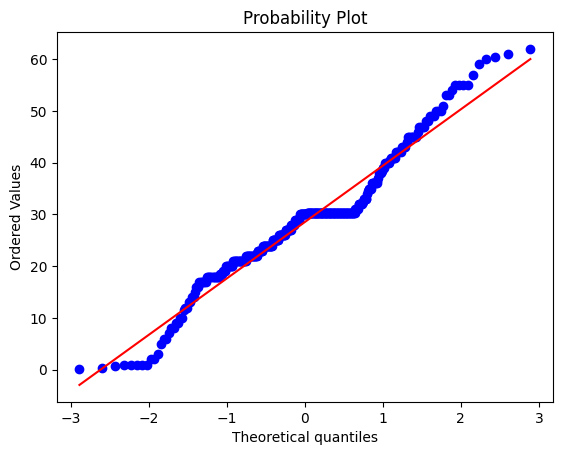

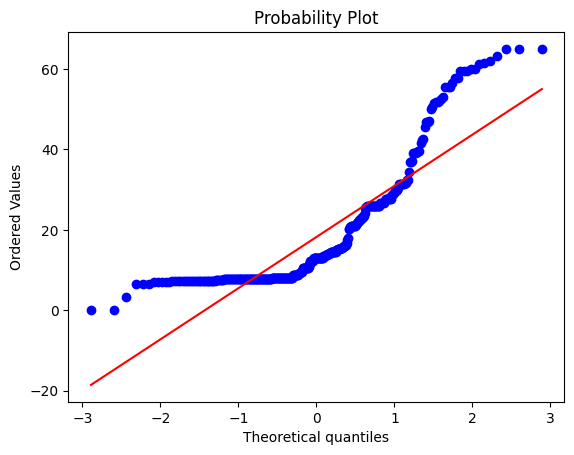

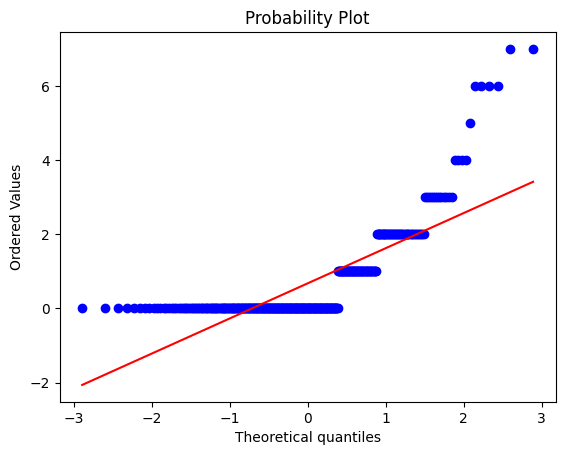

In [38]:
#CHEAKING THE DISTRIBUTION OF AGE SO WE CAN APPLY BEST SCALLING METHOD
from scipy import stats
stats.probplot(titanic_data["Age"] , plot = plt)
plt.show()

#FOR FARE FEATURE
stats.probplot(titanic_data["Fare"],plot = plt)
plt.show()

#FOR FAMILY SIZE
stats.probplot(titanic_data["Family_size"] , plot = plt)
plt.show()


In [39]:
from scipy.stats import skew
#CHEAKING THE SKEWNESS OF AGE
skewness = skew(titanic_data["Age"])
print(f"Skewness: {skewness.round(2)}")

#NOW SAME FOR FARE FEATURE
skewness = skew(titanic_data["Fare"])
print(f"skewness : {skewness.round(2)}")

#LASTLY FOR THE FAMILY SIZE FEATURE
skewness = skew(titanic_data["Family_size"])
print(f"skewness : {skewness.round(2)}")

Skewness: 0.22
skewness : 1.6
skewness : 2.48


IF THE SKEWNESS FALLS UNDER 

Skewness between -0.5 and 0.5: The data is approximately symmetric.

Skewness < -0.5: The data is moderately or highly skewed to the left.

Skewness > 0.5: The data is moderately or highly skewed to the right.

SO FOR THE FEATURE

'AGE' IS KIND A NORMAL DISTRIBUTON SO WE GONNA APPLY STANDARDSCALER

'FARE' IS SLIGHTLY SKEWED VALUE IS GREATER THAN 0.5 AND SKEWED TOWARD LEFT AS WELL AS SAME WITH "FAMILY FEATURE" SO WE GONNA 
APPLY LOG TRANSFORMATION FOR THE BOTH FEATURE TO SCALE THEM IN A SAME RANGE

In [40]:
#SCALING THE AGE FEAUTURE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_data[['Age_scaled']] = scaler.fit_transform(titanic_data[['Age']])
titanic_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Age_scaled
PassengerId,,,,,,,,
892,0,3,0,34.50000,7.8292,0,0,0.537645
893,1,3,1,47.00000,7.0000,1,1,1.666929
894,0,2,0,62.00000,9.6875,0,0,3.022070
895,0,3,0,27.00000,8.6625,1,0,-0.139925
896,1,3,1,22.00000,12.2875,1,2,-0.591638
...,...,...,...,...,...,...,...,...
1304,1,3,1,28.00000,7.7750,1,0,-0.049582
1305,0,3,0,30.27259,8.0500,1,0,0.155730
1307,0,3,0,38.50000,7.2500,1,0,0.899016


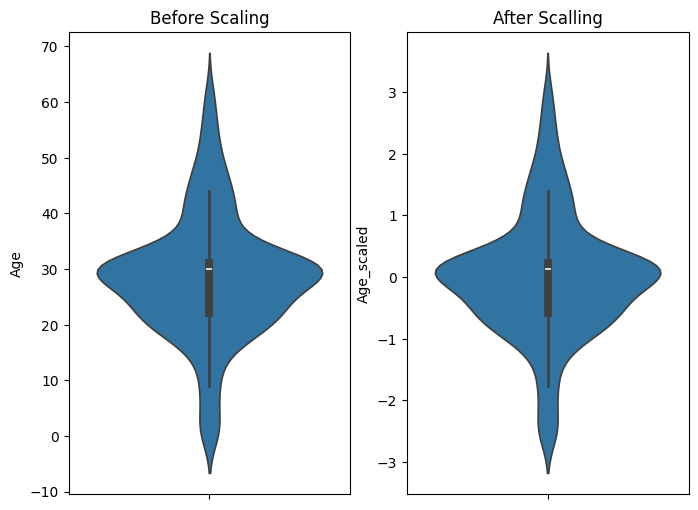

In [41]:
#BEFORE SCALLING
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=titanic_data["Age"])
plt.title('Before Scaling')

#AFTER SCALLING
plt.subplot(1,2,2)
sns.violinplot(titanic_data["Age_scaled"])
plt.title('After Scalling')

plt.show()

In [42]:
#SCALLING THE FARE AND FAMILY SIZE FEATURE WIHT LOG TRANSFORMATION
columns_to_scale = ["Fare" , "Family_size" ]
for col in columns_to_scale:
    titanic_data[col + "_log "] = np.log(titanic_data[col] + 1)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Age_scaled,Fare_log,Family_size_log
PassengerId,,,,,,,,,,
892,0,3,0,34.50000,7.8292,0,0,0.537645,2.178064,0.000000
893,1,3,1,47.00000,7.0000,1,1,1.666929,2.079442,0.693147
894,0,2,0,62.00000,9.6875,0,0,3.022070,2.369075,0.000000
895,0,3,0,27.00000,8.6625,1,0,-0.139925,2.268252,0.000000
896,1,3,1,22.00000,12.2875,1,2,-0.591638,2.586824,1.098612
...,...,...,...,...,...,...,...,...,...,...
1304,1,3,1,28.00000,7.7750,1,0,-0.049582,2.171907,0.000000
1305,0,3,0,30.27259,8.0500,1,0,0.155730,2.202765,0.000000
1307,0,3,0,38.50000,7.2500,1,0,0.899016,2.110213,0.000000


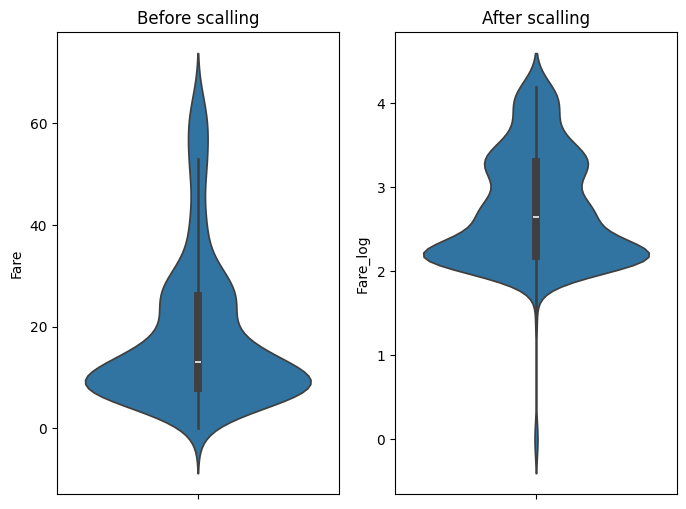

In [43]:
#compaprison of feautres before and after scalling

#BEFORE SCALLING OF FARE FEATURE
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.violinplot(titanic_data["Fare"])
plt.title("Before scalling")

#AFTER THE SCALLING OF FARE FEATURE
plt.subplot(1,2,2)
sns.violinplot(titanic_data["Fare_log "])
plt.title("After scalling")
plt.show()

SO FARE WE HAVE DONE ALL THE ALL THE PRE PROCESSING THINGS NOW LASTLY WE GONNA MOVE TO TRAIN OUR MODEL

# MODEL SELECTION
DEFINING THE DEPENDENT AND INDEPENDENT FEATURES

In [44]:
#Assuming titanic_data is your DataFrame containing the Titanic dataset
correlation_matrix = titanic_data.corr()

# Print the correlation of each feature with the target variable 'Survived'
print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived            1.000000
Sex                 1.000000
Family_size_log     0.251189
Family_size         0.198372
Fare_log            0.184075
Fare                0.175577
Pclass             -0.039529
Embarked           -0.081102
Age_scaled         -0.090522
Age                -0.090522
Name: Survived, dtype: float64


AS THIS SEX FEATURE CAN CLEARY SHOW THE HIGH CORRELATION WITH THE TARGET VARIBLE WHICH CAN LED TO DATA LEAKAGE AND PROVIDE NEGITITVE
IMPACT ON MODEL PERFORMANCE SO WE GONNA REMOVE THIS FEATRUE TOO...

In [45]:
titanic_data.drop(['Sex'] , axis = 1 , inplace=True)

In [46]:
X = titanic_data.drop(["Survived"] , axis = 1)
Y = titanic_data["Survived"]

In [47]:
X

,Pclass,Age,Fare,Embarked,Family_size,Age_scaled,Fare_log,Family_size_log
PassengerId,,,,,,,,
892,3,34.50000,7.8292,0,0,0.537645,2.178064,0.000000
893,3,47.00000,7.0000,1,1,1.666929,2.079442,0.693147
894,2,62.00000,9.6875,0,0,3.022070,2.369075,0.000000
895,3,27.00000,8.6625,1,0,-0.139925,2.268252,0.000000
896,3,22.00000,12.2875,1,2,-0.591638,2.586824,1.098612
...,...,...,...,...,...,...,...,...
1304,3,28.00000,7.7750,1,0,-0.049582,2.171907,0.000000
1305,3,30.27259,8.0500,1,0,0.155730,2.202765,0.000000
1307,3,38.50000,7.2500,1,0,0.899016,2.110213,0.000000


In [48]:
Y

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1304    1
1305    0
1307    0
1308    0
1309    0
Name: Survived, Length: 361, dtype: int64

In [49]:
#IMPORTING THE MODEL ON WE WE GONNA TRAIN OUT DATA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# Define your models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Function to fit and evaluate all models
def best_model(X_train, Y_train, X_test, Y_test):
    for model_name, model in models.items():
        # Fitting the model
        model.fit(X_train, Y_train)
    
        # Predicting and evaluating on training data
        Y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(Y_train, Y_train_pred)
        
        # Predicting and evaluating on test data
        Y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
        print(f'Accuracy score for {model_name}:')
        print(f'Training Accuracy = {train_accuracy:.4}')
        print(f'Test Accuracy = {test_accuracy:.4}')

best_model(X_train, Y_train, X_test, Y_test)


Accuracy score for DecisionTreeClassifier:
Training Accuracy = 0.9762
Test Accuracy = 0.6514
Accuracy score for SVC:
Training Accuracy = 0.6587
Test Accuracy = 0.6789
Accuracy score for RandomForestClassifier:
Training Accuracy = 0.9762
Test Accuracy = 0.6606
Accuracy score for KNeighborsClassifier:
Training Accuracy = 0.75
Test Accuracy = 0.6789
Accuracy score for LogisticRegression:
Training Accuracy = 0.6706
Test Accuracy = 0.6697
Accuracy score for GradientBoostingClassifier:
Training Accuracy = 0.9325
Test Accuracy = 0.6789


C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# HYPER PARAMETER TUNIING

In [51]:
#Define the Models and Hyperparameter Grids

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

param_grids = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'C': np.logspace(-3, 2, 6),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'KNeighborsClassifier': {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'LogisticRegression': {
        'C': np.logspace(-3, 4, 10),
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
        'max_depth': [3, 5, 10]
    }
}


In [52]:
#Perform Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

best_models = {}
for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    
    param_grid = param_grids[model_name]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    search = RandomizedSearchCV(
        model, param_grid, n_iter=50, scoring='accuracy', cv=cv, n_jobs=-1, random_state=42
    )
    search.fit(X_train, Y_train)
    
    best_model = search.best_estimator_
    best_score = search.best_score_
    best_params = search.best_params_
    
    Y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score: {best_score:.4f}")
    print(f"Test Accuracy = {test_accuracy:.4f}")
    print("-" * 50)
    
    best_models[model_name] = best_model


Running RandomizedSearchCV for DecisionTreeClassifier...


C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'max_depth': 20, 'criterion': 'entropy'}
Best cross-validation score: 0.6475
Test Accuracy = 0.5872
--------------------------------------------------
Running RandomizedSearchCV for SVC...


C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#Evaluate All Best Models
for model_name, model in best_models.items():
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f"{model_name} Test Accuracy = {test_accuracy:.4f}")


# THE BEST MODEL IS SVC SO WE GONNA REFINED HAYPER TUNE IT.


In [ ]:
# Refined Hyperparameter Tuning with GridSearchCV for SVC
param_dist_svc = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV
random_search_svc = RandomizedSearchCV(SVC(), param_distributions=param_dist_svc, n_iter=20, 
                                        scoring='accuracy', cv=5, n_jobs=-1, random_state=42)
random_search_svc.fit(X_train, Y_train)

best_svc = random_search_svc.best_estimator_
print(f"Best Parameters for SVC: {random_search_svc.best_params_}")
print(f"Best CV Score for SVC: {random_search_svc.best_score_:.4f}")


# MODEL EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

Y_test_pred = best_svc.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy for SVC: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(Y_test, Y_test_pred)
print("Classification Report:")
print(cr)

# ROC AUC Score
if len(np.unique(Y_test)) == 2:  # ROC AUC is only applicable for binary classification
    roc_auc = roc_auc_score(Y_test, best_svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(Y_test, best_svc.decision_function(X_test))
    plt.figure()
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    print(f"ROC AUC Score: {roc_auc:.4f}")


THE SVC ROC AUC SCORE IS VERY POOR SO WE GONNA GO WITH OTHER MODEL

# RANDOM FOREST

In [ ]:
# Define the parameter grid 
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, Y_train)

# Display the best parameters
print("Best Parameters found by RandomizedSearchCV:")
print(rf_random.best_params_)

# Train the model with the best parameters
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, Y_train)


In [ ]:
# Make predictions on the test set
# Make predictions on the test set
Y_pred = best_rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)


In [ ]:
print(hu)

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get the predicted probabilities for the positive class
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_score_value = roc_auc_score(Y_test, y_prob)

print(f"ROC AUC Score: {roc_auc_score_value:.2f}")

Summary of Model Evaluation and Performance

Objective:

To identify the best classifier for predicting Titanic survival and assess its performance comprehensively.

Models Evaluated:

1.DecisionTreeClassifier

2.SVC

3.RandomForestClassifier

4.KNeighborsClassifier

5.LogisticRegression

6.GradientBoostingClassifier

Key Findings:

Random frest achieved the highest accuracy after hyperparameter tuning, indicating strong performance.
Metrics such as the confusion matrix, classification report, and ROC AUC score provide a fuller picture of model effectiveness beyond accuracy alone.